In [1]:
import pandas as pd
df = pd.read_csv("genel_arac_verileri_egitim_icin.csv")

In [2]:
# Bilimsel gösterimi devre dışı bırak
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# görselleştirme için kütüphaneler
import matplotlib.pyplot as plt
import seaborn as sns

# grafik için ayarlamalar
# Let's set the theme of plots.
sns.set_theme()
sns.set(rc={"figure.dpi":200, "figure.figsize":(4,2)})

In [3]:

df = pd.read_csv("genel_arac_verileri_egitim_icin.csv")

In [4]:
df

,model_yili,fiyat,motor_boyutu,motor_gucu,kullanim,arac_yasi,kac_gun_ilanda,yipranma_degeri
0,2001,136750.00,1.60,110,295635,22,386,6503.97
1,2000,136750.00,1.60,110,189000,23,381,4347.00
2,1999,136900.00,1.60,100,219150,24,399,5259.60
3,1999,136900.00,1.60,100,269000,24,389,6456.00
4,2002,136950.00,1.40,95,340000,21,339,7140.00
...,...,...,...,...,...,...,...,...
479820,2016,1250000.00,1.60,110,125000,7,62,875.00
479821,2014,1250000.00,1.60,105,127000,9,33,1143.00
479822,2022,1250000.00,1.30,140,10000,1,52,10.00
479823,2017,1250000.00,1.60,116,138000,6,67,828.00


In [5]:
df.corr()

,model_yili,fiyat,motor_boyutu,motor_gucu,kullanim,arac_yasi,kac_gun_ilanda,yipranma_degeri
model_yili,1.00,0.75,-0.31,0.49,-0.69,-1.00,-0.02,-0.91
fiyat,0.75,1.00,-0.12,0.49,-0.59,-0.75,-0.48,-0.70
motor_boyutu,-0.31,-0.12,1.00,0.08,0.33,0.31,0.03,0.31
motor_gucu,0.49,0.49,0.08,1.00,-0.42,-0.49,-0.02,-0.39
kullanim,-0.69,-0.59,0.33,-0.42,1.00,0.69,-0.02,0.86
arac_yasi,-1.00,-0.75,0.31,-0.49,0.69,1.00,0.02,0.91
kac_gun_ilanda,-0.02,-0.48,0.03,-0.02,-0.02,0.02,1.00,-0.00
yipranma_degeri,-0.91,-0.70,0.31,-0.39,0.86,0.91,-0.00,1.00


In [6]:
#ŞİMDİ BAĞIMLI DEĞİŞKEN BAĞIMSIZ DEĞİKEN KISMI 
# •	Bağımlı(fiyat(TL))  değişkenimiz bağımsız(kullanim, model_yili vs) değişkenlerden etiklenir.

In [7]:
#Datada ögrnecek kolonları ve sonuc kolonlarını ayırıyoruz

y=df["fiyat"].values
x=df.drop("fiyat",axis=1).values

In [8]:
#Verileri train ve test data olarak 2 ye ayrılır
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [9]:
#Makinin daha rahat ögrenmesi icin verileri 0 ile 1 arasında skaler ediyoruz

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [10]:
x_train

array([[0.96428571, 0.42857143, 0.75      , ..., 0.03571429, 0.31192661,
        0.00398857],
       [0.85714286, 0.28571429, 1.        , ..., 0.14285714, 0.69357798,
        0.01237831],
       [0.60714286, 0.57142857, 0.5625    , ..., 0.39285714, 0.26238532,
        0.22239696],
       ...,
       [0.32142857, 0.42857143, 0.25      , ..., 0.67857143, 0.1412844 ,
        0.79963877],
       [0.21428571, 0.28571429, 0.5       , ..., 0.78571429, 0.1412844 ,
        0.45084553],
       [0.57142857, 0.57142857, 0.375     , ..., 0.42857143, 0.73027523,
        0.32761258]])

In [11]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [14]:
model.fit(x=x_train, y = y_train,validation_data=(x_test,y_test),batch_size=250,epochs=350)

Epoch 1/350
1344/1344 [==============================] - 6s 4ms/step - loss: 273327439872.0000 - val_loss: 86300696576.0000
Epoch 2/350
1344/1344 [==============================] - 5s 4ms/step - loss: 58570620928.0000 - val_loss: 32481984512.0000
Epoch 3/350
1344/1344 [==============================] - 5s 4ms/step - loss: 22315479040.0000 - val_loss: 17024037888.0000
Epoch 4/350
1344/1344 [==============================] - 5s 4ms/step - loss: 13886856192.0000 - val_loss: 11657977856.0000
Epoch 5/350
1344/1344 [==============================] - 5s 4ms/step - loss: 10770724864.0000 - val_loss: 10343543808.0000
Epoch 6/350
1344/1344 [==============================] - 5s 4ms/step - loss: 10260284416.0000 - val_loss: 10265361408.0000
Epoch 7/350
1344/1344 [==============================] - 5s 4ms/step - loss: 10224477184.0000 - val_loss: 10253088768.0000
Epoch 8/350
1344/1344 [==============================] - 6s 4ms/step - loss: 10215164928.0000 - val_loss: 10231516160.0000
Epoch 9/350
134

In [15]:
#Kayip verilerine bakıyoruz ne kadar dusuk olursa okadar iyi
KayipVeri=pd.DataFrame(model.history.history)
KayipVeri.head()

,loss,val_loss
0,240290430976.00,76482420736.00
1,55078440960.00,36632289280.00
2,25920137216.00,19752732672.00
3,16234054656.00,13190040576.00
4,11488996352.00,10536326144.00


<AxesSubplot:>

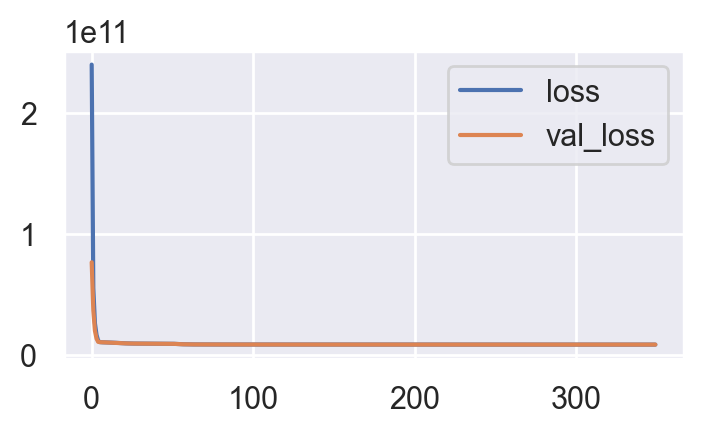

In [16]:
#Kayip verileri görselestiiryoruz
KayipVeri.plot()

In [17]:
# Modeli kaydet (HDF5 formatında)

model.save('cnn_modeli.h5')

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
#Test datasını sokup test etiriyoruz
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
TahminiFrame=model.predict(x_test)

4499/4499 [==============================] - 9s 2ms/step


In [21]:
mean_absolute_error(y_test,TahminiFrame)

64575.73261058247

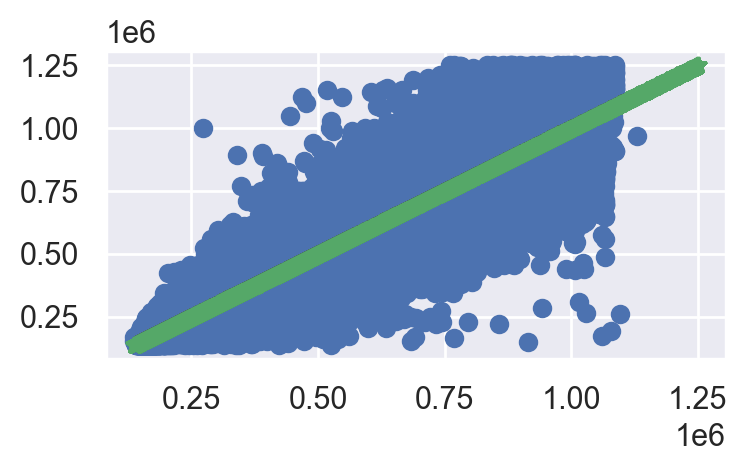

In [22]:
#Veriyi görseleştiriyoruz
plt.scatter(TahminiFrame,y_test)
plt.plot(y_test,y_test,"g-*")

In [23]:
import numpy as np

rastgele_ornek_sayisi = 5

rastgele_test_indeksleri = np.random.choice(len(x_test), rastgele_ornek_sayisi, replace=False)
rastgele_test_ornekleri = x_test[rastgele_test_indeksleri, :]

tahmin_fiyatlar = model.predict(rastgele_test_ornekleri)

for i in range(len(tahmin_fiyatlar)):
    gercek_fiyat = y_test[rastgele_test_indeksleri[i]]
    tahmin_fiyat = tahmin_fiyatlar[i][0]

    print(f'Rastgele Test Örneği {i + 1} İçin Gerçek Fiyat:  {gercek_fiyat:.2f}')
    print(f'Rastgele Test Örneği {i + 1} İçin Tahmini Fiyat: {tahmin_fiyat:.2f}')
    print('---')


1/1 [==============================] - 0s 28ms/step
Rastgele Test Örneği 1 İçin Gerçek Fiyat:  500000.00
Rastgele Test Örneği 1 İçin Tahmini Fiyat: 385003.75
---
Rastgele Test Örneği 2 İçin Gerçek Fiyat:  405000.00
Rastgele Test Örneği 2 İçin Tahmini Fiyat: 415000.06
---
Rastgele Test Örneği 3 İçin Gerçek Fiyat:  545000.00
Rastgele Test Örneği 3 İçin Tahmini Fiyat: 583790.69
---
Rastgele Test Örneği 4 İçin Gerçek Fiyat:  230000.00
Rastgele Test Örneği 4 İçin Tahmini Fiyat: 318506.78
---
Rastgele Test Örneği 5 İçin Gerçek Fiyat:  475000.00
Rastgele Test Örneği 5 İçin Tahmini Fiyat: 374716.94
---


In [24]:
# Modeli yükle
from keras.models import load_model
model = load_model('cnn_modeli.h5')

In [25]:
ornek_index = 76
test_ornek = x_test[ornek_index, :].reshape(1, -1)

tahmin_fiyat_test_ornek = model.predict(test_ornek)
gercek_fiyat_test_ornek = y_test[ornek_index]

print(f'Test Örneği İçin Gerçek Fiyat:  {gercek_fiyat_test_ornek:.2f}')
print(f'CNN ile Test Örneği İçin Tahmini Fiyat: {tahmin_fiyat_test_ornek.item():.2f}')




1/1 [==============================] - 0s 102ms/step
Test Örneği İçin Gerçek Fiyat:  228750.00
CNN ile Test Örneği İçin Tahmini Fiyat: 265921.56


In [ ]:
# CNN İLE ARAYUZ
import tkinter as tk
from tkinter import Label, Entry, Button
import pandas as pd
from keras.models import load_model
import numpy as np

def tahmin_yap():
    # Giriş alanlarının değerlerini al
    model_yili = float(girisler[0].get())
    motor_boyutu = float(girisler[1].get())
    motor_gucu = float(girisler[2].get())
    kullanim = float(girisler[3].get())
    arac_yasi = float(girisler[4].get())
    kac_gun_ilanda = float(girisler[5].get())
    yipranma_degeri = float(girisler[6].get())

    # Giriş değerleriyle Pandas Series oluştur
    yeniArabaSeries = pd.Series({
        'model_yili': model_yili,
        'motor_boyutu': motor_boyutu,
        'motor_gucu': motor_gucu,
        'kullanim': kullanim,
        'arac_yasi': arac_yasi,
        'kac_gun_ilanda': kac_gun_ilanda,
        'yipranma_degeri': yipranma_degeri
    })

    yeni_veri = yeniArabaSeries.values.reshape(1, -1)

    # Modeli kullanarak tahmin yap
    tahmin_fiyat = model.predict(yeni_veri)

    # Tahmini fiyatı ekrana yazdır
    tahmin_fiyat_label.config(text=f'Tahmini Fiyat: {tahmin_fiyat[0][0]:,.2f} TL')

# Tkinter penceresini oluştur
root = tk.Tk()
root.title("Araç Fiyat Tahmini")

# Arka plan rengini belirle
root.configure(bg="#F9F7F7")

# Başlık etiketi
baslik_label = Label(root, text="Araç Fiyat Tahmini", font=("Helvetica", 16, "bold"), bg="#F9F7F7", pady=10)
baslik_label.grid(row=0, column=0, columnspan=2)

# Giriş etiketleri ve alanları
etiketler = ["Model Yılı", "Motor Boyutu", "Motor Gücü", "Kullanım", "Araç Yaşı", "Kaç Gün İlanda", "Yıpranma Değeri"]
girisler = []

for i, etiket in enumerate(etiketler):
    Label(root, text=etiket, font=("Helvetica", 12), bg="#F9F7F7").grid(row=i+1, column=0, pady=5, padx=10, sticky='w')
    entry = Entry(root, font=("Helvetica", 12))
    entry.grid(row=i+1, column=1, pady=5, padx=10)
    girisler.append(entry)

# Tahmin butonu
tahmin_button = Button(root, text="Tahmin Yap", command=tahmin_yap, bg="#0074CC", fg="white", font=("Helvetica", 12))
tahmin_button.grid(row=len(etiketler)+1, column=0, columnspan=2, pady=10)

# Tahmini fiyatı gösteren etiket
tahmin_fiyat_label = Label(root, text="Tahmini Fiyat:", font=("Helvetica", 14, "bold"), bg="#F9F7F7", pady=10)
tahmin_fiyat_label.grid(row=len(etiketler)+2, column=0, columnspan=2)

# Pencereyi başlat
root.mainloop()